# 18장 시퀀스 배열로 다루는 순환 신경망(RNN)

[<img src="https://raw.githubusercontent.com/taehojo/taehojo.github.io/master/assets/images/linktocolab.png" align="left"/> ](https://colab.research.google.com/github/taehojo/deeplearning/blob/master/colab/ch18-colab.ipynb)

## 1. LSTM을 이용한 로이터 뉴스 카테고리 분류하기

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import reuters       # 로이터 뉴스 데이터셋 불러오기
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

# 데이터를 불러와 학습셋, 테스트셋으로 나눕니다.
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

# 데이터를 확인해 보겠습니다.
category = np.max(y_train) + 1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [17]:
# 단어의 수를 맞추어 줍니다. 
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)

# 원-핫 인코딩 처리를 합니다.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [18]:

# 모델의 구조를 설정합니다.
model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

# 모델의 실행 옵션을 정합니다.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 학습의 조기 중단을 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

# 모델을 실행합니다.
history = model.fit(X_train, y_train, batch_size=20, epochs=200, validation_data=(X_test, y_test), callbacks=[early_stopping_callback])

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

Epoch 1/200
450/450 [==============================] - 13s 26ms/step - loss: 2.3600 - accuracy: 0.3935 - val_loss: 2.0634 - val_accuracy: 0.4951
Epoch 2/200
450/450 [==============================] - 11s 25ms/step - loss: 1.9724 - accuracy: 0.5115 - val_loss: 1.8689 - val_accuracy: 0.5583
Epoch 3/200
450/450 [==============================] - 11s 25ms/step - loss: 1.7277 - accuracy: 0.5602 - val_loss: 1.6863 - val_accuracy: 0.5703
Epoch 4/200
450/450 [==============================] - 11s 25ms/step - loss: 1.5915 - accuracy: 0.5932 - val_loss: 1.6028 - val_accuracy: 0.5895
Epoch 5/200
450/450 [==============================] - 11s 25ms/step - loss: 1.4223 - accuracy: 0.6418 - val_loss: 1.4315 - val_accuracy: 0.6385
Epoch 6/200
450/450 [==============================] - 11s 25ms/step - loss: 1.2795 - accuracy: 0.6771 - val_loss: 1.3348 - val_accuracy: 0.6625
Epoch 7/200
450/450 [==============================] - 11s 25ms/step - loss: 1.1635 - accuracy: 0.7055 - val_loss: 1.2764 - val_ac

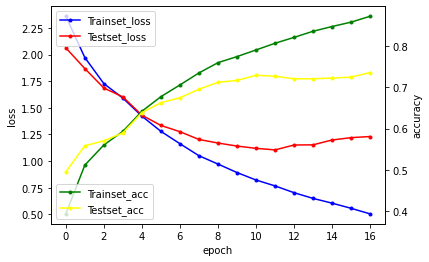

In [40]:
# 학습셋과 테스트셋의 오차를 저장합니다. 
fig, loss_plt = plt.subplots()
acc_plt = loss_plt.twinx()


# 그래프로 표현해 보겠습니다.
loss_plt.plot(history.history['loss'], marker='.', c="blue", label='Trainset_loss')
loss_plt.plot(history.history['val_loss'], marker='.', c="red", label='Testset_loss')
loss_plt.legend(loc='upper left')
loss_plt.set_xlabel('epoch')
loss_plt.set_ylabel('loss')

acc_plt.plot(history.history['accuracy'], marker='.', c="green", label='Trainset_acc')
acc_plt.plot(history.history['val_accuracy'], marker='.', c="yellow", label='Testset_acc')
acc_plt.legend(loc='lower left')
acc_plt.set_ylabel('accuracy')


plt.show()

### 2. LSTM과 CNN의 조합을 이용한 영화 리뷰 분류하기

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

# 데이터를 불러와 학습셋, 테스트셋으로 나눕니다.
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

# 단어의 수를 맞추어 줍니다. 
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

# 모델의 구조를 설정합니다.
model = Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu',strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

17473536/17464789 [==============================] - 2s 0us/step
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 100)         500000    
_________________________________________________________________
dropout (Dropout)            (None, None, 100)         0         
_________________________________________________________________
conv1d (Conv1D)              (None, None, 64)          32064     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 64)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 55)                26400     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 56        
_______________________________________________________

In [ ]:
# 모델의 실행 옵션을 정합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 학습의 조기 중단을 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

# 모델을 실행합니다.
history = model.fit(X_train, y_train, batch_size=40, epochs=100, validation_split=0.25, callbacks=[early_stopping_callback])

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

Epoch 1/100
469/469 [==============================] - 18s 17ms/step - loss: 0.4083 - accuracy: 0.7973 - val_loss: 0.2848 - val_accuracy: 0.8818
Epoch 2/100
469/469 [==============================] - 7s 16ms/step - loss: 0.2360 - accuracy: 0.9113 - val_loss: 0.2785 - val_accuracy: 0.8829
Epoch 3/100
469/469 [==============================] - 7s 16ms/step - loss: 0.1920 - accuracy: 0.9279 - val_loss: 0.3171 - val_accuracy: 0.8624
Epoch 4/100
469/469 [==============================] - 7s 16ms/step - loss: 0.1509 - accuracy: 0.9442 - val_loss: 0.2977 - val_accuracy: 0.8813
Epoch 5/100
782/782 [==============================] - 4s 6ms/step - loss: 0.3367 - accuracy: 0.8796

 Test Accuracy: 0.8796


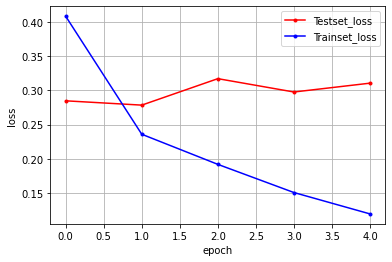

In [ ]:
# 학습셋과 테스트셋의 오차를 저장합니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 보겠습니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다. 
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 3. 어텐션을 사용한 신경망

In [1]:
!pip install attention

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
from attention import Attention

import numpy as np
import matplotlib.pyplot as plt

# 데이터를 불러와 학습셋, 테스트셋으로 나눕니다.
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

# 단어의 수를 맞추어 줍니다. 
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

# 모델의 구조를 설정합니다.
model = Sequential()
model.add(Embedding(5000, 500))
model.add(Dropout(0.5))
model.add(LSTM(64, return_sequences=True))
model.add(Attention())
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

# 모델의 실행 옵션을 정합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 학습의 조기 중단을 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

# 모델을 실행합니다.
history = model.fit(X_train, y_train, batch_size=40, epochs=100,  validation_data=(X_test, y_test), callbacks=[early_stopping_callback])

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

Epoch 1/100
625/625 [==============================] - 32s 50ms/step - loss: 0.3872 - accuracy: 0.8211 - val_loss: 0.2915 - val_accuracy: 0.8784
Epoch 2/100
625/625 [==============================] - 31s 49ms/step - loss: 0.2312 - accuracy: 0.9070 - val_loss: 0.2688 - val_accuracy: 0.8873
Epoch 3/100
625/625 [==============================] - 30s 48ms/step - loss: 0.1700 - accuracy: 0.9363 - val_loss: 0.3014 - val_accuracy: 0.8866
Epoch 4/100
625/625 [==============================] - 30s 48ms/step - loss: 0.1210 - accuracy: 0.9534 - val_loss: 0.3148 - val_accuracy: 0.8840
Epoch 5/100
782/782 [==============================] - 12s 14ms/step - loss: 0.3980 - accuracy: 0.8808

 Test Accuracy: 0.8808


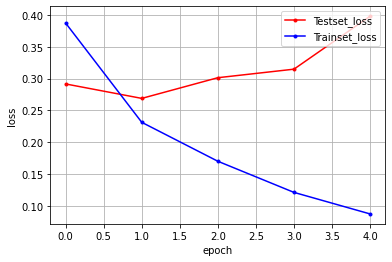

In [ ]:
# 학습셋과 테스트셋의 오차를 저장합니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 보겠습니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다. 
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()